<a href="https://colab.research.google.com/github/MartinNde/MartinN_1/blob/main/Deep_Learning_%26_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [32]:
# import libraries
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from zipfile import ZipFile

from sklearn import metrics
!apt-get install unzip

# set random seeds to get reproducible results
import os
seed = 100
os.environ['PYTHONHASHSEED']=str(seed) 
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 
!pip install keras-tuner

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Load and analyse data set 

In [33]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# # unzip file
import shutil
# shutil.unpack_archive('/content/drive/MyDrive/data (2).zip', '/content/drive/MyDrive/Colab No
shutil.unpack_archive('/content/drive/MyDrive/data DL.zip', '/content/drive/MyDrive/DLdata.zip')

In [35]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df_train = pd.read_csv('/content/drive/MyDrive/DLdata.zip/train.csv')

# summarise the details
print(f'Number of entries: {len(df)}')
df_train.head()
     

Number of entries: 668


,id,A1,A2,A3,A4,A5,A6,A7,A8,class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


In [37]:
df_train.describe()

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='class', ylabel='count'>

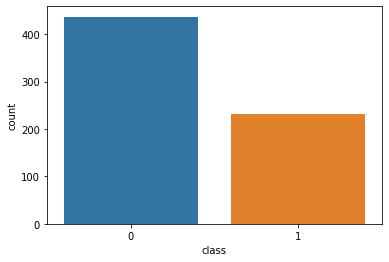

In [38]:
# Summarise class details
sns.countplot(x=df_train['class'])
     


Extracting labels and features

In [39]:
# extract labels
y = df_train['class']

print(y.value_counts())

0    437
1    231
Name: class, dtype: int64


In [40]:
# remove unnecessary columns
X = df_train.drop(['id', 'class'], axis=1)

print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      668 non-null    int64  
 1   A2      668 non-null    int64  
 2   A3      668 non-null    int64  
 3   A4      668 non-null    int64  
 4   A5      668 non-null    int64  
 5   A6      668 non-null    float64
 6   A7      668 non-null    float64
 7   A8      668 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 41.9 KB
None


,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


M1 

Model using 8 features and 2 hiden layers

Let's select the first 8 features for this model

In [41]:
X1 = X.iloc[:, 0:8]
X1.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Scalling data using standard scaler

In [42]:
# Scale the input features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.65032019  0.85517899  0.16664284 ...  0.22244787  0.4387335
   1.44486338]
 [-0.83638032 -1.09726242 -0.14086384 ... -0.67254976 -0.37031249
  -0.1787051 ]
 [ 1.2450004   1.93986866 -0.24336607 ... -1.09447722  0.57064317
  -0.09325413]
 ...
 [-0.83638032 -0.26050182  0.57665176 ...  0.37587604 -0.76311018
  -0.77686192]
 [ 0.05563999  0.76220559  0.67915399 ...  0.08180539 -0.71034631
   3.15388284]
 [ 1.8396806  -0.29149295  0.06414062 ... -0.55747864 -0.98589096
   0.59035365]]


Split Data

In [43]:
# split data to train and validation sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_scaled, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 467
validation data set size: 201


Build a Model

In [44]:
# define the keras model
#model1 = keras.Sequential()
#model1.add(layers.Dense(4, input_dim=8, activation='relu'))
#model1.add(layers.Dense(16, activation='relu'))
#model1.add(layers.Dense(8, activation='relu'))
#model1.add(layers.Dense(4, activation='relu'))
#model1.add(layers.Dense(1, activation='sigmoid'))

#model1.summary()

In [45]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# build the model
def model_builder(hp):
  model = tf.keras.Sequential()
  # specify the input layer separately to the first layer
  model.add(tf.keras.layers.Dense(units=9,input_dim=8))

  # Try between 1 to 4 layers and vary the number of units
  # inside the layers between 32 and 256
  for i in range(hp.Int('number_of_layers', 1, 4)):
        hp_units = hp.Int(f'hidden_layer_{i}_units', min_value=4, max_value=16, step=4)
        model.add(Dense(units=hp_units, activation='relu'))

  # Specify the output layer
  model.add(Dense(units=1, activation='sigmoid'))

  # set the optimiser in the compile method
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

Setup the tuner by calling kt.Hyperband and specifying the model_builder function as the first parameter

In [46]:
import keras_tuner as kt
# instatiate the tuner and perform hypertuning
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 50,
                     factor = 3,            # factor is a number that determines how many models are created to run in parallel whaen testing the hyperparameters
                     directory = 'my_dir2', # directory that the tuned hyperparameter results are stored in (change the name of this directory if you get the message INFO:tensorflow:Oracle triggered exit)
                     project_name = 'intro_to_kt') 

In [47]:
# define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [48]:

import IPython
# run the hyperparameter search
tuner.search(X_train1, y_train1, epochs = 50, validation_data = (X_val1, y_val1), callbacks = [ClearTrainingOutput()])
     


In [49]:
# print out the hyperparameters keras tuner has determined to be the best values
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'number_of_layers': 1, 'hidden_layer_0_units': 16, 'hidden_layer_1_units': 12, 'hidden_layer_2_units': 16, 'hidden_layer_3_units': 16, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [50]:
# set the model to have the optimum hyperparameters and print the summary so we can see the 
model = tuner.hypermodel.build(best_hps)
model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 81        
                                                                 
 dense_4 (Dense)             (None, 16)                160       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________


In [51]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# train model
history = model.fit(X_train1, y_train1, batch_size=50, epochs=50, validation_data=(X_val1, y_val1))

     


Epoch 1/50
10/10 [==============================] - 1s 26ms/step - loss: 0.6822 - accuracy: 0.5824 - val_loss: 0.6922 - val_accuracy: 0.6070
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6393 - accuracy: 0.6296 - val_loss: 0.6535 - val_accuracy: 0.6617
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6063 - accuracy: 0.6981 - val_loss: 0.6249 - val_accuracy: 0.7015
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.5848 - accuracy: 0.7302 - val_loss: 0.6016 - val_accuracy: 0.7363
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.5658 - accuracy: 0.7366 - val_loss: 0.5832 - val_accuracy: 0.7463
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5528 - accuracy: 0.7388 - val_loss: 0.5687 - val_accuracy: 0.7562
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5418 - accuracy: 0.7495 - val_loss: 0.5567 - val_accuracy: 0.7612
Epoch 8/50
10/10 [=

Validate Model

In [53]:
# get model predictions
y_pred1 = model.predict(X_val1)
print(y_pred1[:10])

7/7 [==============================] - 0s 3ms/step
[[0.20674686]
 [0.4327583 ]
 [0.10443455]
 [0.06202339]
 [0.6352582 ]
 [0.02016706]
 [0.86172605]
 [0.34693077]
 [0.53656375]
 [0.13677582]]


In [54]:
# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:10])
     

[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]


In [55]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')


     

Accuracy: 0.7910447761194029


In [56]:
#Model Accuracy Results
print("Results:")
print("--------")
scores = model.evaluate(X_train1, y_train1, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model.evaluate(X_val1, y_val1, verbose=False)
print("Validation Accuracy: %.2f%%\n" % (scores[1] * 100))

Results:
--------
Training Accuracy: 78.59%

Validation Accuracy: 79.10%



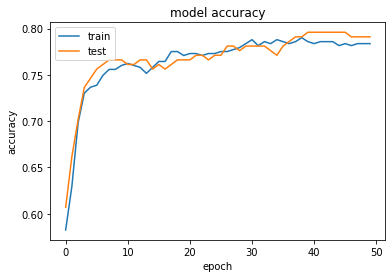

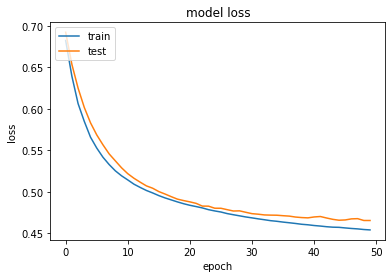

In [57]:
# plot the history of the training
# summarize the history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Test Predictions

In [58]:
df_test = pd.read_csv('/content/drive/MyDrive/DLdata.zip/test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [59]:
X_test1 = X_test.iloc[:, 0:8]
X_test1.head()
     


,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [70]:

X_test_scaled = scaler.fit_transform(X_test)
# print(X_test_scaled)

In [65]:
test_pred = model.predict(X_test_scaled)
# print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

# test_pred_encoded = le.inverse_transform(test_pred_categorical)
# print(test_pred_encoded)
     

4/4 [==============================] - 0s 9ms/step
[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


In [71]:
df_test['prediction']=test_pred_categorical
df_test = df_test[["id", "prediction"]]

In [72]:
df_test.head()


,id,prediction
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [74]:
# Created by Hansi at 12/19/2022
import json

data = []
for index, row in df_test.iterrows():
    data.append({'id': int(row['id']), 'prediction': int(row['prediction'])})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'id': 1, 'prediction': 0}, {'id': 2, 'prediction': 0}, {'id': 3, 'prediction': 1}, {'id': 4, 'prediction': 0}, {'id': 5, 'prediction': 0}]
